In [22]:
#Implementing K means clustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
#Import  the iris data 
"""
We know Attribute Information:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica"""
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
#First try the built in package
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
pred=kmeans.labels_

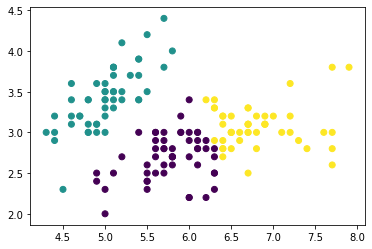

In [23]:
#Plot the results, diffrent colors are differnt clusters. 
#plt.plot(X[:,0],X[:,1],'.')
plt.scatter(X[:, 0], X[:, 1], c=pred);

In [24]:
#Plot the original data and labels
plt.scatter(X[:, 1], X[:, 2]);

IndexError: index 2 is out of bounds for axis 1 with size 2

[[5. 2.]
 [5. 5.]
 [6. 4.]]


array([5.38516481, 7.07106781, 7.21110255])

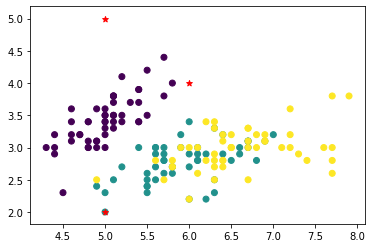

In [29]:
#Implement k means from scratch
import numpy as np
from copy import deepcopy

#Distance calculator
def euc_dist(x,y):
    return np.linalg.norm(x-y,axis=1)

#Number of clusters
k=3

# Initialize X coordinate of random centroids
c_x=np.random.randint(3,np.max(X),size=k)
c_y=np.random.randint(2,np.max(X),size=k)
c=np.array(list(zip(c_x,c_y)),dtype=np.float32)
print(c)
#Plot the random points in the plot
plt.scatter(X[:, 0], X[:, 1], c=y);
plt.scatter(c_x,c_y,marker='*',c='r');
#Store the values of centroids when it updates
c_old=np.zeros(c.shape)
#cluster labels
clusters=np.zeros(len(X))
#error function
error=euc_dist(c,c_old)
error

In [30]:
#Run loop till error is zero
j=1
while (error.any()>=0.1):
    for i in range(len(X)):
        distance=euc_dist(X[i],c)
        cluster=np.argmin(distance)
        clusters[i]=cluster
     #Store old centroid values
    c_old=deepcopy(c)
     #Find new centroid
    for i in range(k):
        points=[X[j] for j in range(len(X)) if clusters[j]==i]
        c[i]=sum(points)/len(points)
    error=euc_dist(c,c_old)

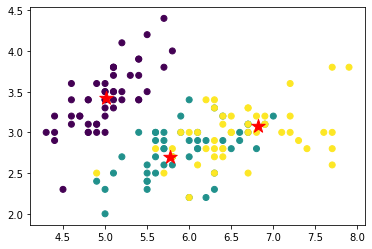

In [31]:
#plot the data
plt.scatter(X[:, 0], X[:, 1], c=y);
#Plot the mean of the points 
plt.scatter(c[0,0],c[0,1],marker='*',c='r',s=200);
plt.scatter(c[1,0],c[1,1],marker='*',c='r',s=200);
plt.scatter(c[2,0],c[2,1],marker='*',c='r',s=200);

So, we get the centers correct, shows 3 clusters. Todo-make predicted clusters same color.  
Depending on the initialization I get division by zero, sometimes  